Daniel Li, ddl933

### Question 2 - Outliers

Consider the two-dimensional data in DF2 in Lab2 Data.zip. Look at a scatter plot of the data. It contains two points that look like potential outliers. Which one is “more” outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1) is more outlying than the point at (5.5, 5), even though the latter point is“farther away” from the nearest points. Plot the data again after performing this transformation. Provide discussion as appropriate to justify your choice of transformation.

Hint: if y comes from a standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity matrix), and $Q = 
\begin{pmatrix}
2 & \frac 1 2 \\
\frac 1 2 & 2
\end{pmatrix}$

what is the covariance matrix of the random variable z = Qy? If you are given z, how would you create a random Gaussian vector with covariance equal to the identity, using z?

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

['Unnamed: 0', '0', '1'] 



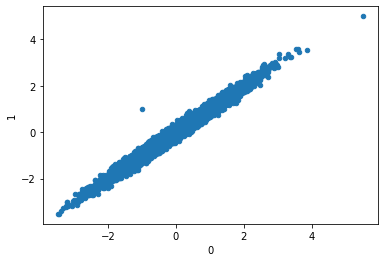

In [2]:
# Reading data and making the dataframe 
data = pd.read_csv('DF2')
testdata = pd.read_csv('DF2')
df = pd.DataFrame(data)

# From looking at the dataframe, the first column seemed to just count num. of data entries. Second and third columns are actual data.
print(list(df), '\n')

# Plotting scatter plot of the data
scatterPlot = df.plot.scatter(x='0', y='1', c = None)

From scatter plot, two data points seem to be outliers. (-1, 1) and (5.5, 5). We can also that most data points are ploted around the line x = y.

In [3]:
np.cov(df['0'], df['1'])

array([[1.00464777, 0.9942424 ],
       [0.9942424 , 1.00415964]])

In [4]:
# Transformation Matrix
q = np.asarray([[1, -1],
                [-1, 1]])

In [5]:
# Transforming all data by z = Qy where z is output data, y is input data (data graphed above), Q is transformation matrix, Qy is dot product
x = np.asarray(df['0'])
y = np.asarray(df['1'])
z = np.zeros(len(x))
for i in range(0, len(x)):
    z = [x[i], y[i]]
    c = np.dot(q, z)
    x[i] = c[0]
    y[i] = c[1]


array([[ 0.02032261, -0.02032261],
       [-0.02032261,  0.02032261]])

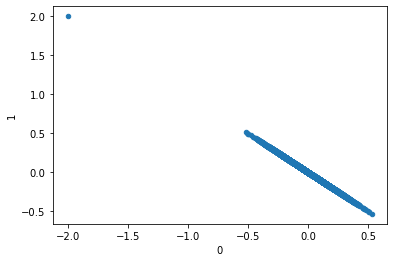

In [6]:
# Graph new matrix and show covariance matrix.
scatterPlot = df.plot.scatter(x= '0', y= '1', c = None)
cov_matrix = np.cov(df['0'], df['1'])
cov_matrix

In [7]:
# Outlier we want to separate
a = [-1, 1]
c = np.dot(q, a)
c

array([-2,  2])

The transformation matrix $Q=\begin{pmatrix}
1 & -1 \\
-1 & 1
\end{pmatrix}$ was picked because points around the x=y line would all be mapped arouned the origin as it would subtract x and y allowing new x and y to be 0 since the original x and y's are around x=y.
Meanwhile the outlier since it is (-1, 1) would have its new coordinates at (-2, 2).